In [ ]:
import random
word_list = ['apple', 'tiger', 'plane', 'chair', 'grape']
chosen_word = random.choice(word_list)
guessed_word = ['_'] * len(chosen_word)
guessed_letters = []
max_attempts = 6
attempts = 0

print("Welcome to Hangman!")
print("Guess the word, one letter at a time.")
print("You have 6 incorrect guesses.\n")

while attempts < max_attempts and '_' in guessed_word:
    print("Word:", ' '.join(guessed_word))
    guess = input("Enter a letter: ").lower()

    if not guess.isalpha() or len(guess) != 1:
        print("Please enter a single valid letter.\n")
        continue

    if guess in guessed_letters:
        print("You already guessed that letter. Try again.\n")
        continue

    guessed_letters.append(guess)

    if guess in chosen_word:
        for idx, char in enumerate(chosen_word):
            if char == guess:
                guessed_word[idx
                             ] = guess
        print("Good guess!\n")
    else:
        attempts += 1
        print(f"Wrong guess. You have {max_attempts - attempts} attempts left.\n")

if '_' not in guessed_word:
    print("Congratulations! You guessed the word:", chosen_word)
else:
    print("Game Over! The word was:", chosen_word)


Welcome to Hangman!
Guess the word, one letter at a time.
You have 6 incorrect guesses.

Word: _ _ _ _ _


Enter a letter:  e


Wrong guess. You have 5 attempts left.

Word: _ _ _ _ _


Enter a letter:  a


Good guess!

Word: _ _ a _ _


Enter a letter:  s


Wrong guess. You have 4 attempts left.

Word: _ _ a _ _


Enter a letter:  p


Wrong guess. You have 3 attempts left.

Word: _ _ a _ _


Enter a letter:  v


Wrong guess. You have 2 attempts left.

Word: _ _ a _ _


Enter a letter:  n


Wrong guess. You have 1 attempts left.

Word: _ _ a _ _


Enter a letter:  h


Good guess!

Word: _ h a _ _


Enter a letter:  c


Good guess!

Word: c h a _ _


Enter a letter:  i


Good guess!

Word: c h a i _


Enter a letter:  r


Good guess!

Congratulations! You guessed the word: chair


📈 Welcome to the Stock Portfolio Tracker!

📊 Your Investment Summary:
AAPL: 10 shares × $180 = $1800
TSLA: 5 shares × $250 = $1250
GOOG: 8 shares × $140 = $1120

💰 Total Investment Value: $4170
✅ Data saved to portfolio.csv
✅ Data saved to portfolio.txt


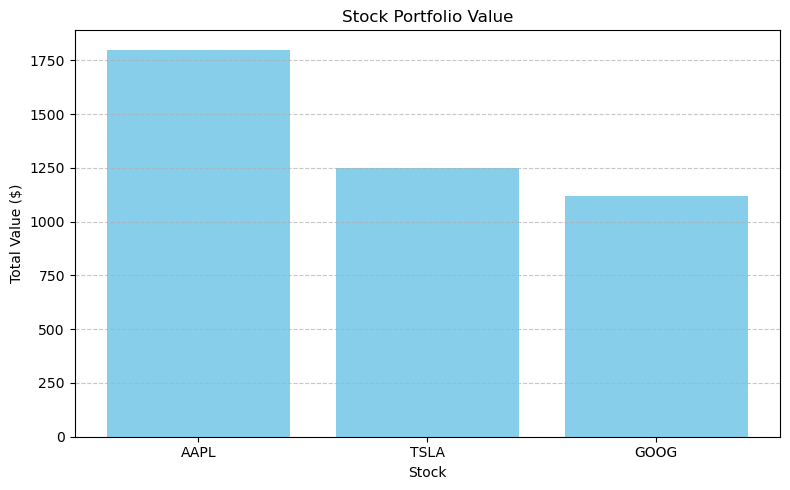

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Fore, init

# Initialize colorama
init(autoreset=True)

# Hardcoded stock prices
stock_prices = {
    "AAPL": 180,
    "TSLA": 250,
    "GOOG": 140,
    "MSFT": 320,
    "AMZN": 125
}

# Predefined portfolio (you can change values here)
portfolio = {
    "AAPL": 10,
    "TSLA": 5,
    "GOOG": 8
}

total_value = 0

# Display welcome message
print(Fore.GREEN + "📈 Welcome to the Stock Portfolio Tracker!\n")

# Display investment summary
print(Fore.YELLOW + "📊 Your Investment Summary:")
for stock, quantity in portfolio.items():
    value = stock_prices[stock] * quantity
    total_value += value
    print(f"{stock}: {quantity} shares × ${stock_prices[stock]} = ${value}")

print(Fore.CYAN + f"\n💰 Total Investment Value: ${total_value}")

# Save to CSV file
df = pd.DataFrame([{
    "Stock": stock,
    "Quantity": quantity,
    "Price": stock_prices[stock],
    "Total Value": stock_prices[stock] * quantity
} for stock, quantity in portfolio.items()])
df.to_csv("portfolio.csv", index=False)
print(Fore.GREEN + "✅ Data saved to portfolio.csv")

# Save to TXT file
with open("portfolio.txt", "w") as f:
    for stock, quantity in portfolio.items():
        f.write(f"{stock}: {quantity} × ${stock_prices[stock]} = ${stock_prices[stock]*quantity}\n")
    f.write(f"\nTotal Investment Value: ${total_value}")
print(Fore.GREEN + "✅ Data saved to portfolio.txt")

# Visualize portfolio as a bar graph
stocks = list(portfolio.keys())
values = [stock_prices[stock] * quantity for stock, quantity in portfolio.items()]

plt.figure(figsize=(8, 5))
plt.bar(stocks, values, color='skyblue')
plt.title("Stock Portfolio Value")
plt.xlabel("Stock")
plt.ylabel("Total Value ($)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
